Given a list of accounts where each element accounts[i] is a list of strings, where the first element accounts[i][0] is a name, and the rest of the elements are emails representing emails of the account.
<br>
Now, we would like to merge these accounts. Two accounts definitely belong to the same person if there is some common email to both accounts. Note that even if two accounts have the same name, they may belong to different people as people could have the same name. A person can have any number of accounts initially, but all of their accounts definitely have the same name.
<br>
After merging the accounts, return the accounts in the following format: the first element of each account is the name, and the rest of the elements are emails in sorted order. The accounts themselves can be returned in any order.
<br>
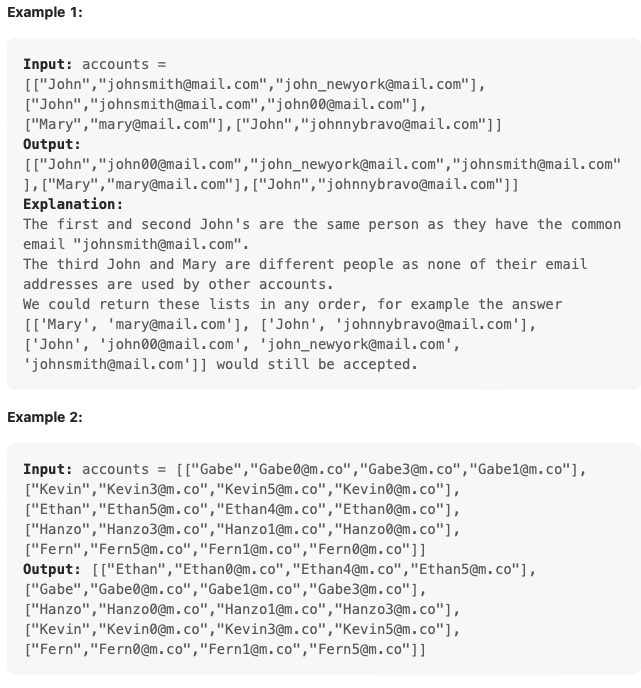

In [2]:
accounts = [["John","johnsmith@mail.com","john_newyork@mail.com"],
            ["John","johnsmith@mail.com","john00@mail.com"],["Mary","mary@mail.com"],
            ["John","johnnybravo@mail.com"]]

In [50]:
import collections

def accountsMerge(accounts):
    graph = collections.defaultdict(set)
    name_to_email = {}
    res = []
    for account in accounts:
        name = account[0]
        for email in account[1:]:
            graph[email].add(account[1])
            graph[account[1]].add(email)
            name_to_email[email] = name
    visited = set() 
    for email in graph:
        if email not in visited:
            stack = [email]
            visited.add(email)
            temp_res = []
            while stack:
                curr = stack.pop()
                temp_res.append(curr)
                for neb in graph[curr]:
                    if neb not in visited:
                        stack.append(neb)
                        visited.add(neb)
            res.append([name_to_email[email]]+sorted(temp_res))
            
    return res

In [51]:
accountsMerge(accounts)

[['John', 'john00@mail.com', 'john_newyork@mail.com', 'johnsmith@mail.com'],
 ['Mary', 'mary@mail.com'],
 ['John', 'johnnybravo@mail.com']]